# K-Means (평균을 이용한 군집화)

1. 개념 
    - k개의 그룹으로 자동 분류하는 비지도 학습 알고리즘
    - 종속변수가 존재하지않는 데이터에서 유사한 데이터들 끼리의 모음
    - 서로 가까운 데이터는 같은 그룹으로 묶어서 그룹화 
    - 그룹의 중심점을 반복적으로 계산해서 군집을 형성 
2. 작업의 순서 
    - 초기의 중심점(k개)을 선택
    - 각각의 데이터들을 중심점과 거리를 확인 
    - 가까운 거리를 중심점으로 할당 
    - 각 군집의 평균을 구해서 새로운 중심점을 설정 
    - 중심점의 변화가 거의 없을때까지 반복 실행 
3. 장, 단점
    - 장점 : 빠르고 단순하여 대용량의 데이터에서 적합 
    - 단점 : 군집의 수를 미리 알고 작성해야된다는 단점. 이상치 민감
4. 매개변수 
    - n_clusters
        - 기본값 : 8
        - 군집의 개수를 지정 
        - 너무 작거나 크면 성능의 저하 가능 
    - init 
        - 기본값 : 'k-means++'
        - 초기의 중심점의 설정 방법 
        - 기본값을 사용하면 빠르고 안정적 
        - 'random'은 중심점 무작위 선택 
    - n_init
        - 기본값 : 'auto' (구버전은 10)
        - 초기화 여러번 시도하여 최적의 결과를 선택 
        - 값이 클수록 안정적이지만 시간은 증가 
    - max_iter 
        - 기본값 : 300
        - 한번의 실행에서 최대의 반복 횟수 
        - 일반적으로 300-500 사용
    - tol
        - 기본값 : 1e-4
        - 중심점의 이동의 변화량이 이 값보다 작은 경우에는 수렴 
        - 값이 작을수록 정확하지만 시간은 증가 
    - algorithm
        - 기본값 : 'lloyd'
        - K-Means의 계산 방법 
        - 'elkan' -> 속도 향상 (밀집 데이터에서 유리)
5. 속성 
    - cluster_centers_
        - 각 군집의 중심점 좌표
    - labels_
        - 각 데이터의 군집의 번호 
    - lnertia_
        - 군집 내의 거리 제곱합
        - 작을수록 군집이 응집되어있음을 의미 
    - n_iter_
        - 마지막 반복에서의 수행 횟수 
6. 메서드 
    - fit()
        - 모델의 학습
    - predict()
        - 새로운 데이터를 받아서 어떤 군집에 속하는지 예측
    - fit_predict()
        - 학습과 예측을 동시에 작업 
    - transform()
        - 각 데이터와 각 중심점간의 거리를 행렬 반환
    - fit_transform()
        - 적합 + 거리행렬 반환 
    - score()
        - inertia_ 값을 반환 (값이 클수록 군집의 품질 높다.)
    - get_params() / set_params()
        - 사용한 매개변수의 확인 및 변경 (GridSearchCV 에서 사용)
7. 검증 
    - inertia
        - 군집 내의 거리 제곱합 (작을수록 응집)
    - silhouette_score
        - 응집도 + 분리도 의 종합 점수 (1의 가까울수록 좋음)
    - calinski_harabasz_score
        - 군집 간의 분산 / 군집 내의 분산 비율 (높을수록 좋음)
    - davies_bouldin_score
        - 군집 간의 유사도 평균 (낮을수록 좋음)
    - adjusted_rand_score
        - 실제의 라벨과 군집의 일치도 (1 = 일치, 0 = 무작위)
    - nomalized_mutual_info_score
        - 정보이론적 일치도 ( 1 = 일치, 0 = 무관 )

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_score, \
    calinski_harabasz_score, \
    davies_bouldin_score, adjusted_rand_score, \
    normalized_mutual_info_score

In [2]:
iris = pd.read_csv("../data/iris.csv")
# 독립 변수 
x = iris.drop('target', axis = 1).values
# 종속 변수 (실제 라벨 데이터 - 검증에서 사용할 용도)
y = iris['target'].values

In [3]:
# Kmeans 모델을 생성 
model = KMeans(
    n_clusters=3, 
    random_state=42, 
    n_init=10
)

In [4]:
# 군집화는 Scaler 일반적 
x_std = StandardScaler().fit_transform(x)

In [5]:
# 모델에 학습 
model.fit(x_std)
labels = model.predict(x_std)

In [6]:
# 검증 지표를 계산하고 출력 
# 군집 내의 거리의 제곱합
inertia = model.inertia_
silhouette = silhouette_score(x_std, labels)
calinski = calinski_harabasz_score(x_std, labels)
davies = davies_bouldin_score(x_std, labels)
# 실제 라벨과의 계산
ari = adjusted_rand_score(y, labels)
nmi = normalized_mutual_info_score(y, labels)
print("inertia : ", round(inertia, 3))
print("silhouette : ", round(silhouette, 3))
print('calinski : ', round(calinski, 3))
print("davies : ", round(davies, 3) )
print('ARI : ', round(ari, 3))
print('NMI : ', round(nmi, 3))

inertia :  140.966
silhouette :  0.459
calinski :  239.342
davies :  0.835
ARI :  0.62
NMI :  0.659


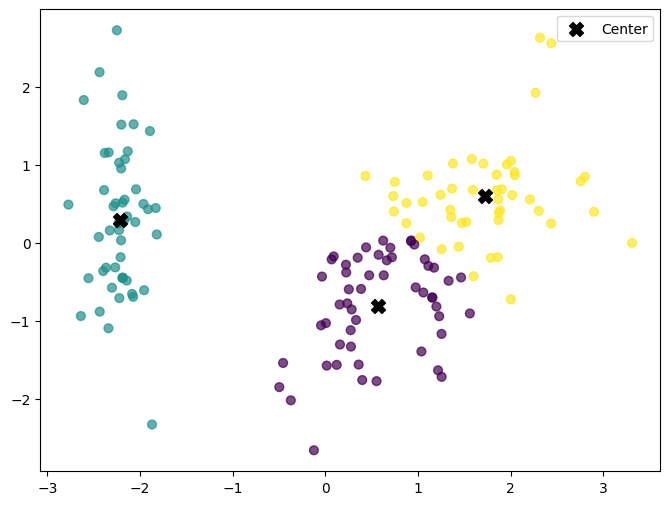

In [8]:
# 군집의 상황을 2차원 그래프로 시각화 (PCA 사용)
pca = PCA(n_components=2)
# 스케일링 된 데이터를 학습 및 변환
x_pca = pca.fit_transform(x_std)
# 중심점을 pca을 이용하여 2차원 데이터로 변환
centers_pca = pca.transform(model.cluster_centers_)

plt.figure(figsize=(8, 6))
# 2차원으로 구성된 스케일링 데이터의 산점도
plt.scatter(
    x_pca[:, 0], x_pca[:, 1], c = labels, cmap='viridis', 
    s = 40, alpha=0.7
)
# 2차원으로 구성된 중심점 데이터의 좌표 표시 
plt.scatter(
    centers_pca[:, 0], centers_pca[:, 1], c = 'black', 
    s = 100, marker='X', label = 'Center'
)
plt.legend()
plt.show()

In [9]:
# bodyPerformance 데이터를 이용하여 Kmeans 사용 
df = pd.read_csv("../data/bodyPerformance.csv")

In [ ]:
df.head()

In [11]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 문자형 데이터를 숫자형으로 변환 
# gender 컬럼의 데이터를 숫자형으로 변환 
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'].values)
df.head()

In [13]:
df['gender'].value_counts()

gender
1    8467
0    4926
Name: count, dtype: int64

In [18]:
# 데이터프레임에서 문자열인 컬럼의 목록을 불러온다. 
obj_cols = df.select_dtypes('object').columns.tolist()
obj_cols

['class']

In [19]:
# obj_cols를 이용하여 반복문을 실행
for obj in obj_cols:
    # LabelEncoder를 생성 
    le = LabelEncoder()
    # 각 컬럼의 데이터들을 LabelEncoder()를 이용하여 변환 
    df[obj] = le.fit_transform(df[obj].values)

In [20]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,0
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,1
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,1


In [21]:
# 독립 변수, 종속 변수 생성 
X = df.drop('class', axis=1).values
Y = df['class'].values
# 스탠다드 스케일링 
X_std = StandardScaler().fit_transform(X)

In [22]:
# 군집의 개수에 따른 검증 지표 확인 
# 개수를 2개부터 10개까지 확인 
# 검증 지표를 저장할 빈 리스트 생성
rows = []

for k in range(2, 11):
    # k : 군집의 개수 
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    pred = km.fit_predict(X_std)
    # 검증 지표
    iner = km.inertia_
    sil = silhouette_score(X_std, pred)
    cali = calinski_harabasz_score(X_std, pred)
    davies = davies_bouldin_score(X_std, pred)
    ari = adjusted_rand_score(Y, pred)
    nmi = normalized_mutual_info_score(Y, pred)

    row = {
        "K" : k, 
        "inertia" : iner, 
        'silhouette' : sil, 
        'calinski' : cali, 
        'davies' : davies, 
        'ARI' : ari, 
        'NMI' : nmi
    }
    rows.append(row)

In [ ]:
scores = pd.DataFrame(rows)
scores.round(3)

In [27]:
# 최적의 k 값은 2, 원본의 class의 개수는 4
k_list = [2, 4]

final_scores = []

for k in k_list:
    km = KMeans(n_clusters=k, n_init = 10, random_state=42)
    pred = km.fit_predict(X_std)

    iner = km.inertia_
    sil = silhouette_score(X_std, pred)
    cali = calinski_harabasz_score(X_std, pred)
    davies = davies_bouldin_score(X_std, pred)
    row = {
        "K" : k, 
        "silhouette" : sil, 
        "calinski" : cali, 
        "davies" : davies
    }
    final_scores.append(row)

In [28]:
pd.DataFrame(final_scores)

,K,silhouette,calinski,davies
0,2,0.339082,7571.307615,1.234227
1,4,0.218644,4603.595793,1.691045


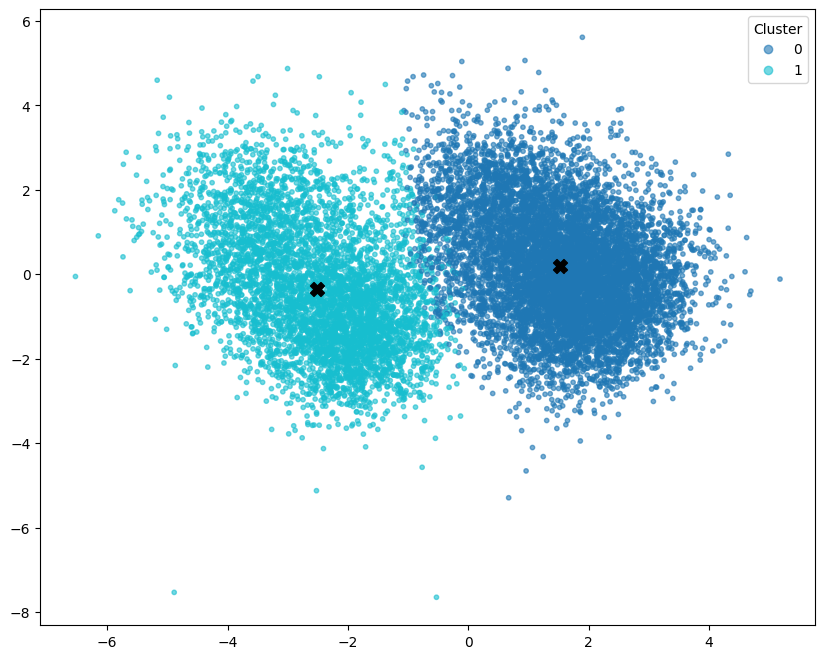

In [29]:
# 군집의 개수가 2인 경우 중심점과 데이터의 군집을 2차원 그래프로 확인 
# PCA를 통해서 2차원으로 차원 축소 후 그래프 시각화
pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(X_std)

km_best = KMeans(n_clusters=2, n_init=10, random_state=42).fit(X_std)
# 군집의 번호를 출력 
labels_best = km_best.labels_
# 군집의 중심점 좌표를 출력 
center_best = km_best.cluster_centers_
# 중심점 2차원 차원 축소
center_pca = pca.transform(center_best)

plt.figure(figsize=(10, 8))
# 2차원으로 차원 축소한 데이터들의 분포
sc = plt.scatter(x_pca[:, 0], x_pca[:, 1], c = labels_best, 
                 s = 10, cmap = 'tab10', alpha=0.6)
# 중심점 좌표를 그래프에 추가 
plt.scatter(center_pca[:, 0], center_pca[:, 1], c = 'black', 
            s = 100, marker='X', label='Center')
plt.legend(*sc.legend_elements(), title='Cluster')
plt.show()


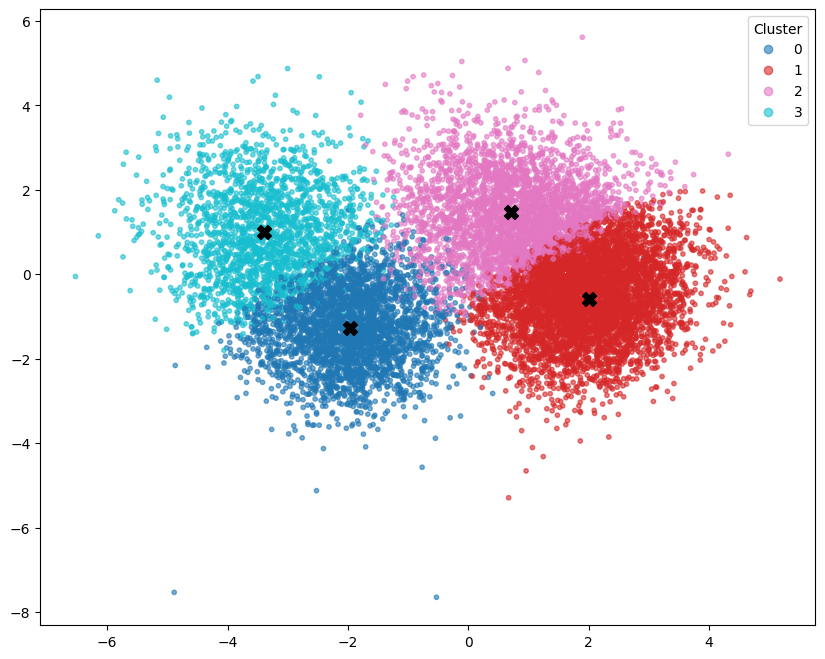

In [30]:
# 군집의 개수가 2인 경우 중심점과 데이터의 군집을 2차원 그래프로 확인 
# PCA를 통해서 2차원으로 차원 축소 후 그래프 시각화
pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(X_std)

km_best = KMeans(n_clusters=4, n_init=10, random_state=42).fit(X_std)
# 군집의 번호를 출력 
labels_best = km_best.labels_
# 군집의 중심점 좌표를 출력 
center_best = km_best.cluster_centers_
# 중심점 2차원 차원 축소
center_pca = pca.transform(center_best)

plt.figure(figsize=(10, 8))
# 2차원으로 차원 축소한 데이터들의 분포
sc = plt.scatter(x_pca[:, 0], x_pca[:, 1], c = labels_best, 
                 s = 10, cmap = 'tab10', alpha=0.6)
# 중심점 좌표를 그래프에 추가 
plt.scatter(center_pca[:, 0], center_pca[:, 1], c = 'black', 
            s = 100, marker='X', label='Center')
plt.legend(*sc.legend_elements(), title='Cluster')
plt.show()


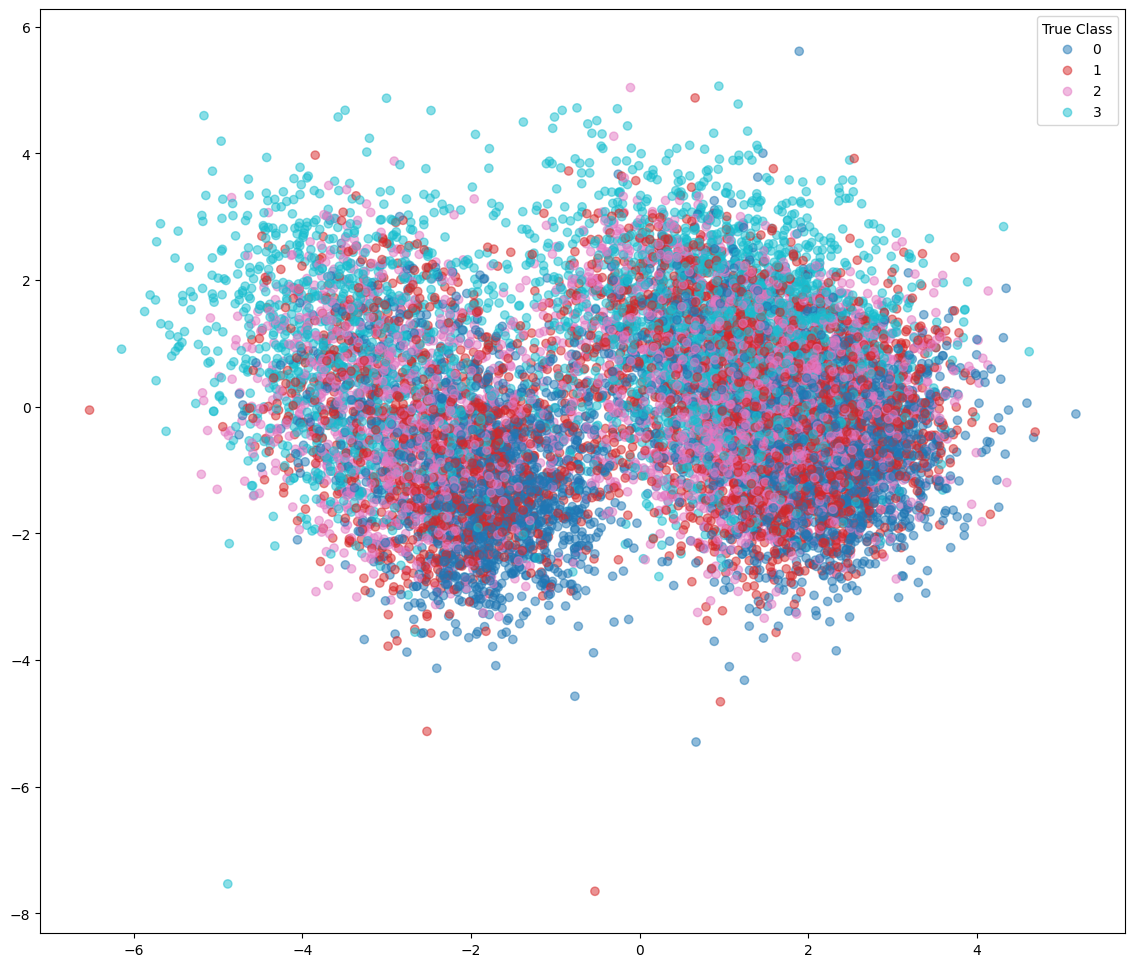

In [34]:
# 실제 class 별 데이터의 분포도를 확인 
plt.figure(figsize=(14, 12))
sc_true = plt.scatter(
    x_pca[:, 0], x_pca[:, 1], c=Y, cmap='tab10', alpha=0.5
)
plt.legend(*sc_true.legend_elements(), title='True Class')
plt.show()

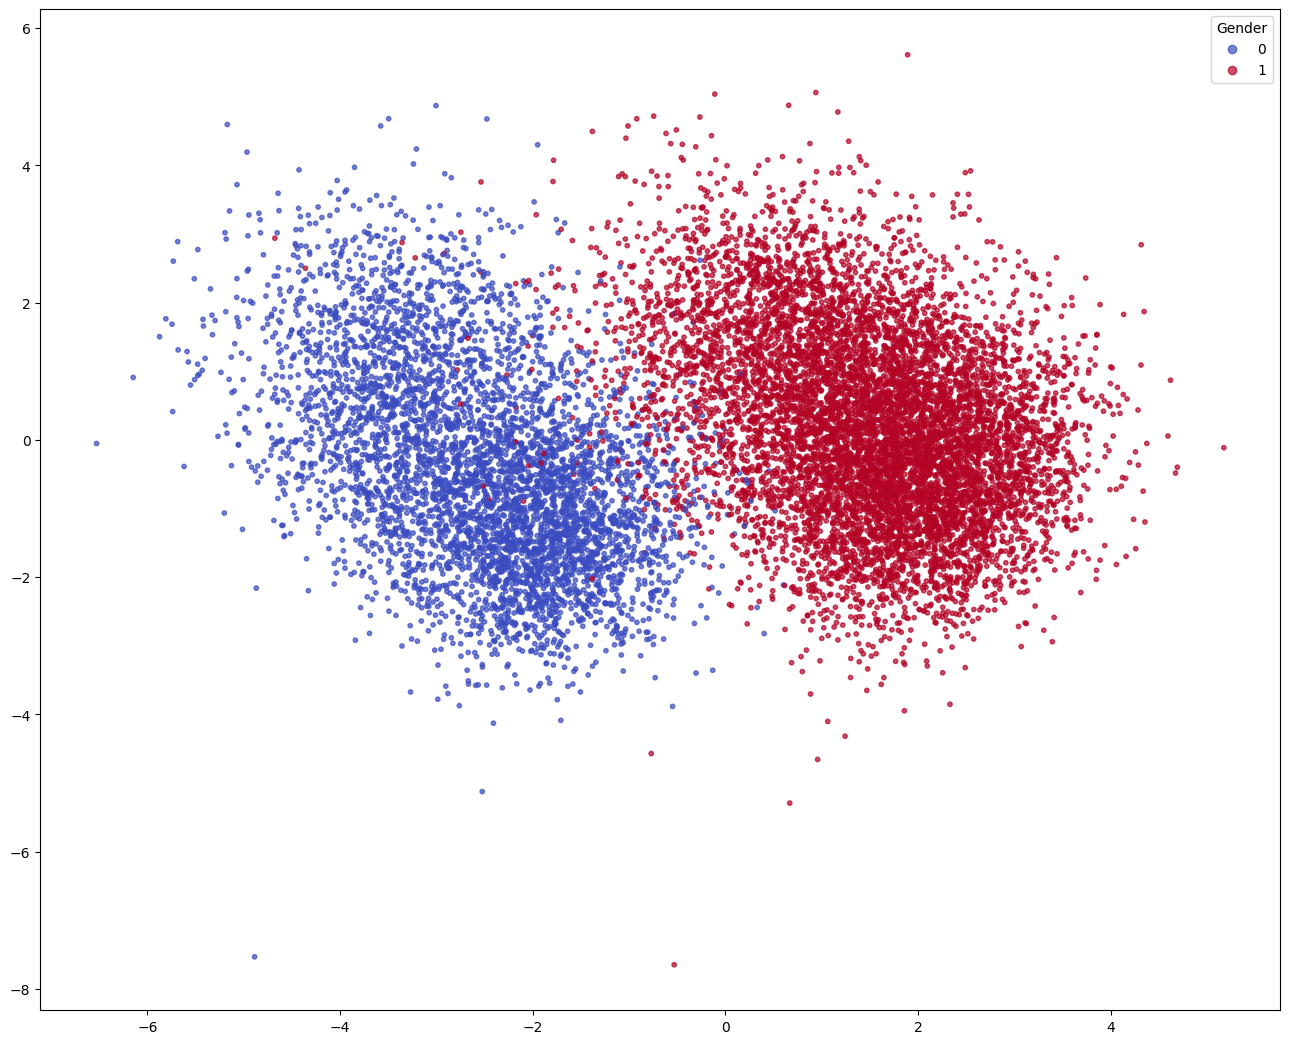

In [35]:
plt.figure(figsize=(16, 13))

sc_gender = plt.scatter(
    x_pca[:, 0], x_pca[:, 1], s=10, alpha=0.7, c=df['gender'].values, 
    cmap = 'coolwarm'
)
plt.legend(*sc_gender.legend_elements(), title='Gender')
plt.show()